In [54]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np

In [33]:
#read csv file
df=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/cleaned_data1.csv')
df.head(5)

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [34]:
#select the required columns for analysis
df_req = df[['quantity', 'manufacturing_cost', 'freight_cost', 'net_sales_amount','holiday_count']]
df_req.head() 

,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,16,85.4272,4.0503,163.98,0
1,3,16.0176,0.7408,24.53,0
2,31,165.5152,7.6096,308.08,0
3,18,96.1056,4.5517,155.88,0
4,2,10.6784,0.5055,18.12,0


In [35]:
#check its shape
df_req.shape

(799962, 5)

In [36]:
#check for missing values
df_req.isnull().sum()

quantity              0
manufacturing_cost    0
freight_cost          0
net_sales_amount      0
holiday_count         0
dtype: int64

In [59]:
df_req.corr()

,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
quantity,1.000000,0.640973,0.626911,0.637767,0.025441
manufacturing_cost,0.640973,1.000000,0.982465,0.991772,0.032561
freight_cost,0.626911,0.982465,1.000000,0.989903,0.037044
net_sales_amount,0.637767,0.991772,0.989903,1.000000,0.029677
holiday_count,0.025441,0.032561,0.037044,0.029677,1.000000


In [50]:
df_req.to_csv('Linear_regression_prep_data.csv')

In [37]:
#define independent and dependent variable
X = df[['quantity', 'manufacturing_cost', 'freight_cost','holiday_count']]
y = df['net_sales_amount']

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
#fit the model
model = LinearRegression()

#train the model
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Calculate fitted values
yhat = model.predict(X_train)

# Calculate residuals
residuals = y_train - yhat

# Create a DataFrame for diagnostics
df_diagnostics = pd.DataFrame({'yhat': yhat, 'r': residuals, 'y': y_train})



In [39]:
#test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 37645.498757014575


In [40]:
#calculate R-squared
r2 = r2_score(y_test, y_pred)

#calculate adjusted R-squared
n = len(X_test)
p = X_test.shape[1]# Number of predictors
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


R-squared: 0.9904011164761178
Adjusted R-squared: 0.9904008764860305


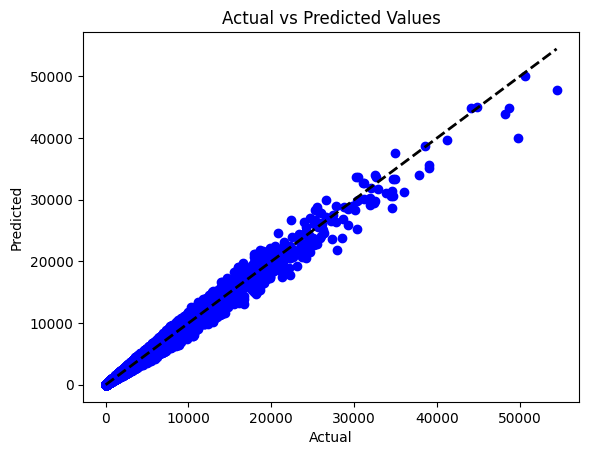

In [41]:
#create a scatter plot between actual and predicted valiues
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [42]:
#add a constant term to the predictor variables matrix
X_train_with_const = sm.add_constant(X_train)

#fit the ols model
ols_model = sm.OLS(y_train, X_train_with_const)
ols_results = ols_model.fit()

#print the summary table
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:       net_sales_amount   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.692e+07
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:52:41   Log-Likelihood:            -4.2752e+06
No. Observations:              639969   AIC:                         8.550e+06
Df Residuals:                  639964   BIC:                         8.550e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 33.7150      0